# Data Science Project - Basketball Players Analysis

Introduction to Data Science (CS 5360/Math 4100)

http://datasciencecourse.net/2016/


**Project team**:
Prathusha Boppana, Sweta Ravi, Qi Liu

**Video link**:
https://www.youtube.com/watch?v=Lfe7b5KhADo&feature=youtu.be

## Background and Motivation

- One of the popular sports in the U.S. is basketball. One of the most important days in any sport is game day. Prathusha did an internship with a basketball team and this idea fascinated the others. Because of the interest in basketball and the importance of game day, we are trying to predict the performance on game day based on various factors taken into consideration for our home team.
- There are variety of factors taken into consideration for the analysis and prediction. For example, players’ performance leading up to game day, injuries, and the influence of a player on the overall team performance


## Project Objectives

- Prediction of the performance of individual players as game day arrives is based on various deciding factors like injury, player involvement, and other measures of performance for each practice. Game day is quite stressful, but also an important day to perform well. Without adding more pressure on the team to perform well on game day, our analytics will help the home team to win the match based on their performance on each day.
- We will use the factors injury, duration of each player’s practice, and the performance of each of the players as game day approaches, to do supervised and unsupervised analysis. Various factors will be used in these analyses to get maximum achieved performance on game day.
- Implementing strategic analysis methods will increase the probability of the team winning games in the future as well as reduce injuries.


##  Input data

In [1]:
# imports and setup 

import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import re

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["Red","Green","Blue","Yellow", "Pink",'Cyan','Black','Magenta'])

In [2]:
# Input file1 containing data of players and their performance, 
# injury status and exertion and exertion criteria
analysis_data = pd.read_csv("Player Data.csv")

In [3]:
# Renaming columns
analysis_data = analysis_data.rename(columns={'rpe': 'Rating_Perceived_Exertion', 'dur': 'Duration_Activity','minply': 'Minutes_played_game','trimp': 'Training_Impulse','TPR':'Team_Performance_Rating'})

In [4]:
# Input file2 containing data of game and Wins and losses or  
# and sttaistics of home team and opponenet team
game_data = pd.read_csv("Gamelogs.csv", header=1)

In [5]:
# Here we remove any empty columns
game_data = game_data.dropna(axis=1, how='all')

In [6]:
# Renaming columns
game_data = game_data.rename(columns={'H/A/N': 'Game_Location', 'W/L': 'Game_Result'})

In [7]:
# Removing bad data
analysis_data=analysis_data[analysis_data['ActivityType'] != 3]

In [8]:
# considering only players data
player_data = analysis_data[analysis_data.iloc[:, 0] != "TEAM"]

## Exploring the Data

In [9]:
analysis_data.describe()

,InjuryStatus,InjuryType,ActivityType,Rating_Perceived_Exertion,Duration_Activity,Minutes_played_game,Training_Impulse,Team_Performance_Rating
count,5665.000000,5665.000000,5664.000000,5553.000000,5680.000000,1295.000000,5592.000000,58.000000
mean,0.207237,0.171403,0.883121,2.332267,94.454544,10.820783,307.958549,50.973099
std,0.651040,0.594015,0.675055,1.998249,67.060802,12.345886,300.388039,30.243924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.304551
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.737168
50%,0.000000,0.000000,1.000000,3.000000,119.000000,3.000000,300.000000,52.041566
75%,0.000000,0.000000,1.000000,4.000000,150.000000,21.838889,500.000000,76.506879
max,6.000000,6.000000,2.000000,10.000000,214.000000,47.000000,1712.000000,99.917358


There are ~5500 data recorded. There are very few instances of an injury. Most of the data that is recorded is for practices.

In [10]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5699 entries, 0 to 5699
Data columns (total 13 columns):
PlayerID                     5699 non-null object
date                         5699 non-null object
InjuryStatus                 5665 non-null float64
InjuryType                   5665 non-null float64
ActivityType                 5664 non-null float64
Rating_Perceived_Exertion    5553 non-null float64
Duration_Activity            5680 non-null float64
Minutes_played_game          1295 non-null float64
Training_Impulse             5592 non-null float64
Location                     3780 non-null object
Opponent                     895 non-null object
Date_Act_Loc_Opp             5699 non-null object
Team_Performance_Rating      58 non-null float64
dtypes: float64(8), object(5)
memory usage: 623.3+ KB


In [11]:
num_ath = len(analysis_data.PlayerID.unique())
# We have to subtract one because there are team values for each day.
print("There are " + str(num_ath-1) + " athletes on the Basketball team.")

There are 24 athletes on the Basketball team.


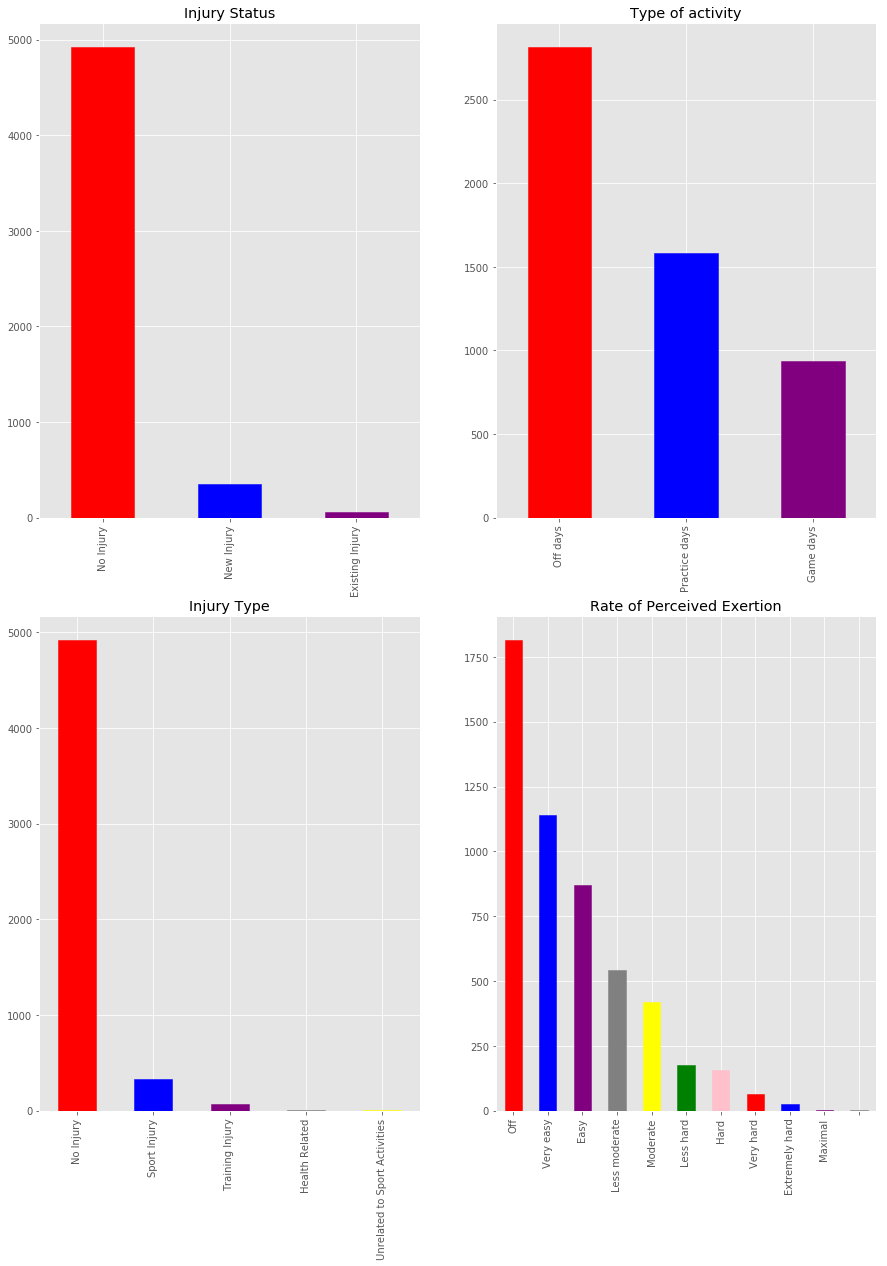

In [12]:
# Plot Categorical variables: InjuryStatus,InjuryType,ActivityType,Rating_Perceived_Exertion
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,20))

x1_labels = ("No Injury","New Injury","Existing Injury")
ax1 = player_data["InjuryStatus"].value_counts().plot(kind='bar',ax=axes[0,0])
ax1.get_children()[0].set_color('red')
ax1.get_children()[1].set_color('blue')
ax1.get_children()[2].set_color('purple')
ax1.set_xticklabels(x1_labels)
ax1.set_title('Injury Status');
x2_labels = ("No Injury","Sport Injury","Training Injury","Health Related",'Unrelated to Sport Activities')
ax2 = player_data["InjuryType"].value_counts().plot(kind='bar',ax=axes[1,0])
ax2.get_children()[0].set_color('red')
ax2.get_children()[1].set_color('blue')
ax2.get_children()[2].set_color('purple')
ax2.get_children()[3].set_color('gray')
ax2.get_children()[4].set_color('yellow')
ax2.set_xticklabels(x2_labels)
ax2.set_title('Injury Type');
x3_labels = ("Off days","Practice days","Game days")
ax3 = player_data["ActivityType"].value_counts().plot(kind='bar',ax=axes[0,1])
ax3.get_children()[0].set_color('red')
ax3.get_children()[1].set_color('blue')
ax3.get_children()[2].set_color('purple')
ax3.set_xticklabels(x3_labels)
ax3.set_title('Type of activity');
x4_labels = ("Off","Very easy","Easy","Less moderate","Moderate","Less hard","Hard","Very hard","Extremely hard","Maximal")
ax4 = player_data["Rating_Perceived_Exertion"].value_counts().plot(kind='bar',ax=axes[1,1]);
ax4.get_children()[0].set_color('red')
ax4.get_children()[1].set_color('blue')
ax4.get_children()[2].set_color('purple')
ax4.get_children()[3].set_color('gray')
ax4.get_children()[4].set_color('yellow')
ax4.get_children()[5].set_color('green')
ax4.get_children()[6].set_color('pink')
ax4.get_children()[7].set_color('red')
ax4.get_children()[8].set_color('blue')
ax4.get_children()[9].set_color('purple')
ax4.get_children()[10].set_color('gray')
ax4.set_xticklabels(x4_labels)
ax4.set_title('Rate of Perceived Exertion');

Figure 1: This figure shows the counts of each categorical variable above over all of the data.

Note: We do not have access to the units for any of these variables.

In [13]:
game_data.describe()

,TEAM_POINTS,OPPONENT_POINTS,TEAM_FG,TEAM_FGA,TEAM_FG%,TEAM_3P,TEAM_3PA,TEAM_3P%,TEAM_FT,TEAM_FTA,...,OPPONENT_FT,OPPONENT_FTA,OPPONENT_FT%,OPPONENT_ORB,OPPONENT_TRB,OPPONENT_AST,OPPONENT_STL,OPPONENT_BLK,OPPONENT_TOV,OPPONENT_PF
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,76.064516,68.419355,27.161290,56.370968,0.482306,7.887097,21.887097,0.358500,13.854839,19.258065,...,12.387097,17.693548,0.699355,8.080645,30.032258,11.387097,6.225806,3.145161,11.790323,19.370968
std,10.423603,12.144686,4.620672,6.648638,0.060615,3.003303,5.018343,0.105145,5.878125,7.531215,...,4.836185,6.053284,0.107163,3.053074,5.034203,3.939522,2.977618,2.118202,3.383359,4.304911
min,55.000000,37.000000,18.000000,41.000000,0.350000,2.000000,12.000000,0.100000,2.000000,4.000000,...,4.000000,6.000000,0.467000,1.000000,20.000000,2.000000,0.000000,0.000000,5.000000,8.000000
25%,67.000000,60.000000,24.000000,53.250000,0.441000,6.000000,19.000000,0.286000,9.000000,13.000000,...,9.000000,13.000000,0.637750,6.000000,27.000000,9.000000,4.000000,1.250000,10.000000,17.000000
50%,76.500000,68.500000,26.000000,56.000000,0.484500,8.000000,21.500000,0.372500,13.500000,19.000000,...,12.000000,17.500000,0.714000,7.500000,30.000000,11.000000,6.000000,3.000000,12.000000,19.000000
75%,84.750000,78.000000,30.000000,61.000000,0.519000,10.000000,25.500000,0.438000,18.000000,23.750000,...,15.000000,21.750000,0.783000,11.000000,32.750000,14.000000,8.000000,4.750000,14.000000,22.000000
max,96.000000,94.000000,39.000000,71.000000,0.600000,15.000000,36.000000,0.583000,29.000000,36.000000,...,30.000000,36.000000,0.909000,15.000000,44.000000,19.000000,14.000000,10.000000,22.000000,31.000000


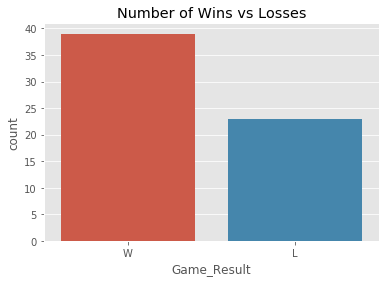

In [14]:
# Show categorical variables
import seaborn as sns
plt.title("Number of Wins vs Losses")
sns.countplot(x="Game_Result", data=game_data)

Figure 2: This graph shows the number of wins and losses for the team over two seasons.

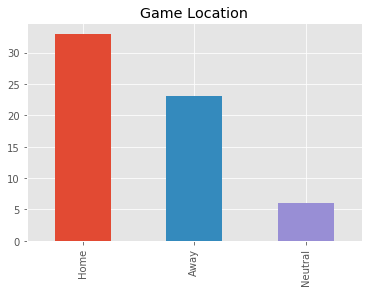

In [15]:
# Game location variable

x1_labels = ("Home","Away","Neutral")
ax1 = game_data["Game_Location"].value_counts().plot(kind='bar')
ax1.set_xticklabels(x1_labels)
ax1.set_title('Game Location');


Figure 3: This plot shows the count of where each game was played: our home ground, our opponent's ground, or neutral ground.

From above distribution, it is clear that most of the games are played on home ground than other places.

In [16]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 38 columns):
Date               62 non-null object
Game_Location      62 non-null object
Opponent           62 non-null object
Game_Result        62 non-null object
TEAM_POINTS        62 non-null int64
OPPONENT_POINTS    62 non-null int64
TEAM_FG            62 non-null int64
TEAM_FGA           62 non-null int64
TEAM_FG%           62 non-null float64
TEAM_3P            62 non-null int64
TEAM_3PA           62 non-null int64
TEAM_3P%           62 non-null float64
TEAM_FT            62 non-null int64
TEAM_FTA           62 non-null int64
TEAM_FT%           62 non-null float64
TEAM_ORB           62 non-null int64
TEAM_TRB           62 non-null int64
TEAM_AST           62 non-null int64
TEAM_STL           62 non-null int64
TEAM_BLK           62 non-null int64
TEAM_TOV           62 non-null int64
TEAM_PF            62 non-null int64
OPPONENT_FG        62 non-null int64
OPPONENT_FGA       62 non-null int64

There is 62 records in the game log file that contains records of win/lose of home team and performance to different opponent.

## Data Visualization

### Data Exploration of Practices VS Game VS Off Days

In [17]:
#Group the data by date and Activity Type, find the size of each ActivityType in each day
date_activity = analysis_data.groupby(['date','ActivityType']).size()
#make a datframe for grouped data
activity_frame = pd.DataFrame(date_activity.reset_index())
activity_frame.columns = ['date','ActivityType','sum']
#Convert date into date format and sort it
activity_frame['date'] = pd.to_datetime(activity_frame.date)
activity_frame.sort_values(['date']).reset_index(drop= True)

,date,ActivityType,sum
0,2016-10-01,0.0,1
1,2016-10-01,1.0,14
2,2016-10-02,0.0,15
3,2016-10-03,1.0,16
4,2016-10-04,1.0,16
5,2016-10-05,0.0,16
6,2016-10-06,1.0,16
7,2016-10-07,1.0,16
8,2016-10-08,1.0,16
9,2016-10-09,0.0,16


In [18]:
#Due to the large number of data, we group the date by month.
activity_frame['year'] = [y.year for y in activity_frame['date']]
activity_frame['month'] = [m.month for m in activity_frame['date']]

In [19]:
#Group off days data by year and month
off = activity_frame.loc[activity_frame['ActivityType'] == 0.0]
off.sort_values(['date']).reset_index(drop=True)
off = off.groupby(['year','month'])['sum'].sum().reset_index(drop=True)
off = pd.DataFrame(off)

#Group practice days data by year and month
practice = activity_frame.loc[activity_frame['ActivityType'] == 1.0]
practice.sort_values(['date']).reset_index(drop=True)
practice = practice.groupby(['year','month'])['sum'].sum().reset_index(drop=True)
practice = practice.append(pd.DataFrame([0]), ignore_index =True)
practice.columns = ['sum']

#Group game days data by year and month
game = activity_frame.loc[activity_frame['ActivityType'] == 2.0]
game.sort_values(['date']).reset_index(drop=True)
game = game.groupby(['year','month'])['sum'].sum().reset_index(drop=True)
game = game.append(pd.DataFrame([0,0,0]), ignore_index =True)
game.columns = ['sum']

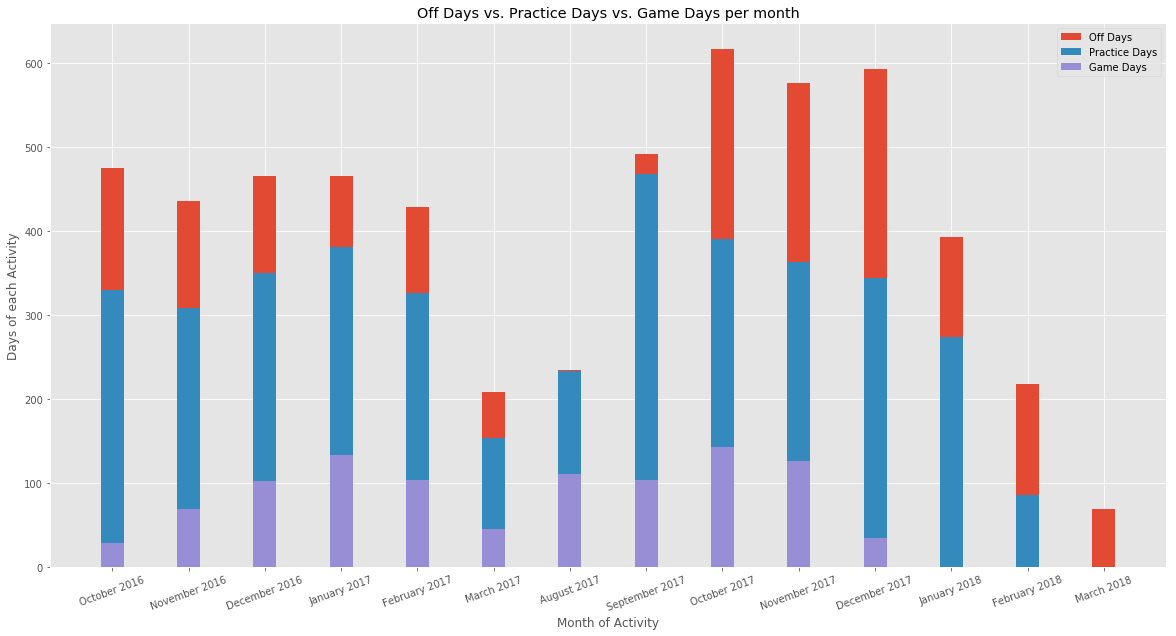

In [20]:
import calendar
#Make bar plot for each type of activity
plt.figure(figsize=(20,10))
plt.title("Off Days vs. Practice Days vs. Game Days per month")
plt.bar(off.index, off['sum'], width = 0.3,label='Off Days', bottom = practice['sum'] + game['sum'])
plt.bar(practice.index, practice['sum'],  width = 0.3,label='Practice Days', bottom = game['sum'])
plt.bar(game.index, game['sum'],  width = 0.3,label='Game Days')
plt.xticks(np.arange(14), ("October 2016", "November 2016", "December 2016", "January 2017", "February 2017", "March 2017", "August 2017", "September 2017", "October 2017", "November 2017", "December 2017", "January 2018", "February 2018", "March 2018"), rotation=20)
plt.xlabel('Month of Activity')
plt.ylabel('Days of each Activity')
plt.legend()

Figure 4: This graph shows the number of days with respect to each activity for each month. It covers two seasons of data.

### Influence of injury on player performance

In [21]:
player_data = analysis_data[analysis_data.iloc[:, 0] != "TEAM"]

In [22]:
player_data.dtypes

PlayerID                      object
date                          object
InjuryStatus                 float64
InjuryType                   float64
ActivityType                 float64
Rating_Perceived_Exertion    float64
Duration_Activity            float64
Minutes_played_game          float64
Training_Impulse             float64
Location                      object
Opponent                      object
Date_Act_Loc_Opp              object
Team_Performance_Rating      float64
dtype: object

([<matplotlib.axis.XTick at 0x1142b2630>,
 <a list of 4 Text xticklabel objects>)

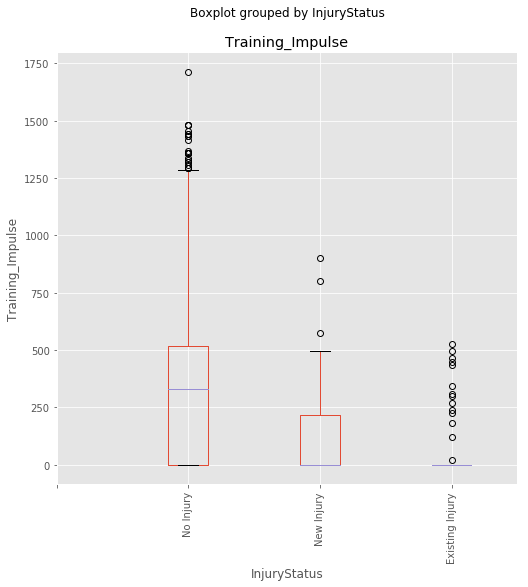

In [23]:
player_data.boxplot(column="Training_Impulse",by= "InjuryStatus",figsize = (8,8))
plt.xlabel('InjuryStatus')
plt.ylabel('Training_Impulse')
labels = ['',"No Injury","New Injury","Existing Injury"]
plt.xticks([0,1,2,3],labels, rotation='vertical')

Figure 5: This boxplot shows the distribution of the players' performance with each injury status.

From the graph above, it is clear that when there is no injury, then the team performance improves. The new injuries seems to decrease the team performace and  still has positive values since other players compensate injured players performance to a significant level.

We still show potential for better performance when there are no injuries and decreasing performance as time with the injury continues. Thereby when the coach  is selecting the players for the game day, he needs comcentrate more on the palayer with no injury and try avoid players with existing injuries.

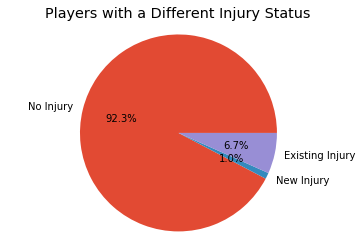

In [24]:
# Pie plot for injury status
injury_status = player_data.groupby("InjuryStatus").apply(lambda players: len(players))
#injury_status
plt.title("Players with a Different Injury Status")
plt.pie(injury_status, explode = (0,0,0), labels = ["No Injury", "New Injury", "Existing Injury"], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Figure 6: This pie chart shows the percentages of basketball players who have each of the following injury status: No Injury, New Injury, and Existing Injury.

([<matplotlib.axis.XTick at 0x11466c5f8>,
 <a list of 6 Text xticklabel objects>)

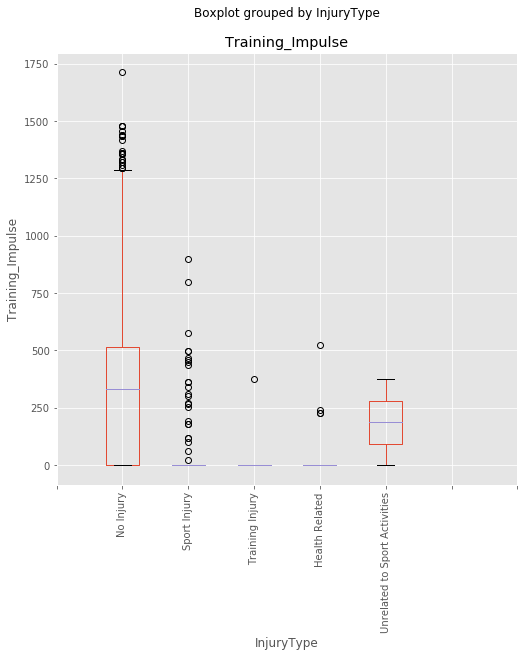

In [25]:
player_data.boxplot(column="Training_Impulse",by= "InjuryType",figsize = (8,8))
plt.xlabel('InjuryType')
plt.ylabel('Training_Impulse')
labels = ['',"No Injury","Sport Injury","Training Injury","Health Related",'Unrelated to Sport Activities']
plt.xticks([0,1,2,3,4,5,6,7],labels, rotation='vertical')

Figure 7: This boxplot shows the distribution of players' performance with each injury type.

From above graph it is obvious that when there is no injury, the performance is good. Whereas when there is an injury due to sports or an injury during training, the injury has bad effect on team performance. However the injuries unrelated to sports are not very severe, hence this injury does not affect the performance. 
Thus when coach selecting players for the game, he would need to look into injury of the player as well, since it effects performance of the team.

The intensity of the injury type also decreases the performance of each player.

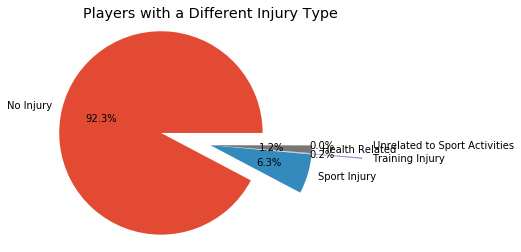

In [26]:
# Pie plot for injury type
injury_type = player_data.groupby("InjuryType").apply(lambda players: len(players))
#injury_type
plt.title("Players with a Different Injury Type")
plt.pie(injury_type, explode = (0.5,0,0.5,0,0.5), labels = ["No Injury", "Sport Injury", "Training Injury", "Health Related", "Unrelated to Sport Activities"], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Figure 8: This pie chart shows the percentages of basketball players who have each of the following injury type: No Injury, Sport Injury, Training Injury, Health Related, and Unrelated to Sport Activities.

#### Influence of activity type on performance of the player

([<matplotlib.axis.XTick at 0x11492a1d0>,
 <a list of 4 Text xticklabel objects>)

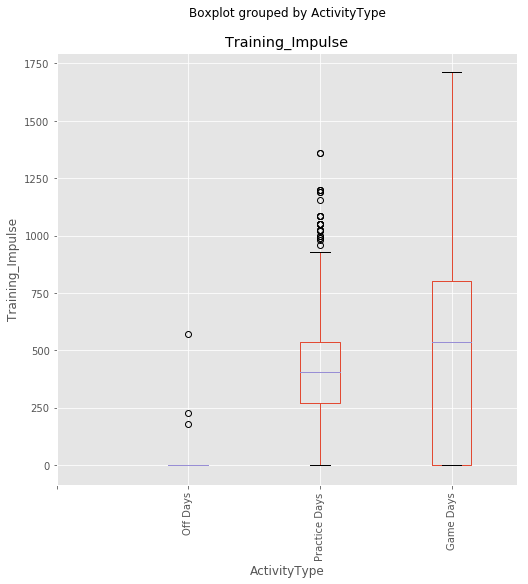

In [27]:
player_data.boxplot(column="Training_Impulse",by= "ActivityType",figsize = (8,8))
plt.xlabel('ActivityType')
plt.ylabel('Training_Impulse')
labels = ["", "Off Days", "Practice Days", "Game Days"]
plt.xticks([0,1,2,3],labels, rotation='vertical')

Figure 9: This boxplot shows the distribution of players' performance with each activity type.

### Visualization of Game log data:

In [28]:
game_data.dtypes

Date                object
Game_Location       object
Opponent            object
Game_Result         object
TEAM_POINTS          int64
OPPONENT_POINTS      int64
TEAM_FG              int64
TEAM_FGA             int64
TEAM_FG%           float64
TEAM_3P              int64
TEAM_3PA             int64
TEAM_3P%           float64
TEAM_FT              int64
TEAM_FTA             int64
TEAM_FT%           float64
TEAM_ORB             int64
TEAM_TRB             int64
TEAM_AST             int64
TEAM_STL             int64
TEAM_BLK             int64
TEAM_TOV             int64
TEAM_PF              int64
OPPONENT_FG          int64
OPPONENT_FGA         int64
OPPONENT_FG%       float64
OPPONENT_3P          int64
OPPONENT_3PA         int64
OPPONENT_3P%       float64
OPPONENT_FT          int64
OPPONENT_FTA         int64
OPPONENT_FT%       float64
OPPONENT_ORB         int64
OPPONENT_TRB         int64
OPPONENT_AST         int64
OPPONENT_STL         int64
OPPONENT_BLK         int64
OPPONENT_TOV         int64
O

In [29]:
game_data["Date"] = pd.to_datetime(game_data["Date"])

In [30]:
game_data.corr()

,TEAM_POINTS,OPPONENT_POINTS,TEAM_FG,TEAM_FGA,TEAM_FG%,TEAM_3P,TEAM_3PA,TEAM_3P%,TEAM_FT,TEAM_FTA,...,OPPONENT_FT,OPPONENT_FTA,OPPONENT_FT%,OPPONENT_ORB,OPPONENT_TRB,OPPONENT_AST,OPPONENT_STL,OPPONENT_BLK,OPPONENT_TOV,OPPONENT_PF
TEAM_POINTS,1.000000,-0.087370,0.778880,0.387588,0.667541,0.418644,0.103248,0.520005,0.334867,0.361056,...,-0.007983,0.100347,-0.210460,0.146130,-0.161555,-0.102818,-0.049598,-0.068739,0.056171,0.258844
OPPONENT_POINTS,-0.087370,1.000000,-0.043876,0.042707,-0.083977,-0.073739,-0.108686,-0.004878,-0.048276,-0.091895,...,0.320684,0.213398,0.313428,0.115794,0.223936,0.683548,0.187284,0.153724,-0.171375,-0.054762
TEAM_FG,0.778880,-0.043876,1.000000,0.662378,0.695290,0.139548,-0.133527,0.358076,-0.262280,-0.183526,...,-0.170102,-0.063261,-0.228920,0.008359,-0.157386,0.021730,-0.084904,0.027717,-0.120489,-0.228872
TEAM_FGA,0.387588,0.042707,0.662378,1.000000,-0.071636,0.045644,0.139341,-0.052048,-0.377379,-0.348000,...,-0.239066,-0.153544,-0.178759,-0.038648,0.225428,0.095821,-0.015894,0.304586,-0.097784,-0.383482
TEAM_FG%,0.667541,-0.083977,0.695290,-0.071636,1.000000,0.140585,-0.309231,0.515715,0.018807,0.100914,...,0.038791,0.087473,-0.091642,0.045485,-0.417517,-0.055632,-0.095942,-0.237966,-0.039330,0.077522
TEAM_3P,0.418644,-0.073739,0.139548,0.045644,0.140585,1.000000,0.721376,0.733674,0.012057,-0.038554,...,-0.033059,-0.042513,0.003896,0.353218,0.167223,-0.026728,0.039561,-0.036036,0.008925,-0.075321
TEAM_3PA,0.103248,-0.108686,-0.133527,0.139341,-0.309231,0.721376,1.000000,0.077625,0.024444,-0.086835,...,-0.060989,-0.137691,0.167948,0.375094,0.379754,-0.084821,0.135579,-0.111014,0.098997,-0.105784
TEAM_3P%,0.520005,-0.004878,0.358076,-0.052048,0.515715,0.733674,0.077625,1.000000,-0.015689,0.021199,...,0.019762,0.092892,-0.172847,0.164310,-0.114189,0.000435,-0.104776,0.058407,-0.126151,-0.002083
TEAM_FT,0.334867,-0.048276,-0.262280,-0.377379,0.018807,0.012057,0.024444,-0.015689,1.000000,0.948485,...,0.270161,0.299121,-0.015298,0.065519,-0.124487,-0.202832,0.025319,-0.147059,0.284475,0.857311
TEAM_FTA,0.361056,-0.091895,-0.183526,-0.348000,0.100914,-0.038554,-0.086835,0.021199,0.948485,1.000000,...,0.238012,0.307060,-0.088433,0.008349,-0.174043,-0.233278,0.042683,-0.100012,0.223476,0.881868


Text(0,0.5,'Win/Lose')

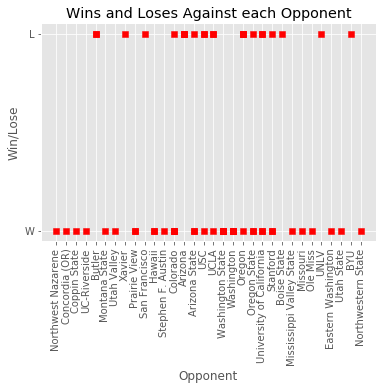

In [31]:
plt.scatter(x=game_data.loc[:,'Opponent'],y=game_data.loc[:,'Game_Result'],c='r',marker='s')
plt.xticks(rotation=90)
plt.title("Wins and Loses Against each Opponent")
plt.xlabel('Opponent')
plt.ylabel('Win/Lose')

Figure 10: This graph shows us which opponents we won against and lost against. If there is only one dot for an opponent, we either only played against them once or we won or lost in both games.

We won most of our games. We won both times against half of the other universities and lost both times against a few of the universities. There were also a few universities where we won once and lost the other time.

### Combining the dataframes to get overall performance and influence on various factors

In [32]:
# Here we have to rename the date column so that we can merge it with the Date column in the other dataframe
analysis_data.rename(index=str, columns={"date": "Date"}, inplace=True)

# We need to change the "Date" column in game_data back to an object type to merge them
org_game_data = pd.read_csv("Gamelogs.csv", header=1)

# We have to change the names of the columns of the new data to match the old data
org_game_data.rename(index=str, columns={"H/A/N": "Game_Location", "W/L": "Game_Result"}, inplace=True)

analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5699 entries, 0 to 5699
Data columns (total 13 columns):
PlayerID                     5699 non-null object
Date                         5699 non-null object
InjuryStatus                 5665 non-null float64
InjuryType                   5665 non-null float64
ActivityType                 5664 non-null float64
Rating_Perceived_Exertion    5553 non-null float64
Duration_Activity            5680 non-null float64
Minutes_played_game          1295 non-null float64
Training_Impulse             5592 non-null float64
Location                     3780 non-null object
Opponent                     895 non-null object
Date_Act_Loc_Opp             5699 non-null object
Team_Performance_Rating      58 non-null float64
dtypes: float64(8), object(5)
memory usage: 623.3+ KB


In [33]:
Complete_data = org_game_data[['Date', 'Game_Location','Opponent','Game_Result','TEAM_POINTS','OPPONENT_POINTS']].merge(analysis_data[['Date','PlayerID','InjuryStatus','ActivityType','Rating_Perceived_Exertion','Duration_Activity','Training_Impulse','Team_Performance_Rating']], on='Date', how='outer')

In [34]:
Complete_data.describe()

,TEAM_POINTS,OPPONENT_POINTS,InjuryStatus,ActivityType,Rating_Perceived_Exertion,Duration_Activity,Training_Impulse,Team_Performance_Rating
count,62.000000,62.000000,5665.000000,5664.000000,5553.000000,5680.000000,5592.000000,58.000000
mean,76.064516,68.419355,0.207237,0.883121,2.332267,94.454544,307.958549,50.973099
std,10.423603,12.144686,0.651040,0.675055,1.998249,67.060802,300.388039,30.243924
min,55.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.304551
25%,67.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.737168
50%,76.500000,68.500000,0.000000,1.000000,3.000000,119.000000,300.000000,52.041566
75%,84.750000,78.000000,0.000000,1.000000,4.000000,150.000000,500.000000,76.506879
max,96.000000,94.000000,6.000000,2.000000,10.000000,214.000000,1712.000000,99.917358


In [35]:
Complete_data.dtypes

Date                          object
Game_Location                 object
Opponent                      object
Game_Result                   object
TEAM_POINTS                  float64
OPPONENT_POINTS              float64
PlayerID                      object
InjuryStatus                 float64
ActivityType                 float64
Rating_Perceived_Exertion    float64
Duration_Activity            float64
Training_Impulse             float64
Team_Performance_Rating      float64
dtype: object

In [36]:
Complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 13 columns):
Date                         5760 non-null object
Game_Location                62 non-null object
Opponent                     62 non-null object
Game_Result                  62 non-null object
TEAM_POINTS                  62 non-null float64
OPPONENT_POINTS              62 non-null float64
PlayerID                     5699 non-null object
InjuryStatus                 5665 non-null float64
ActivityType                 5664 non-null float64
Rating_Perceived_Exertion    5553 non-null float64
Duration_Activity            5680 non-null float64
Training_Impulse             5592 non-null float64
Team_Performance_Rating      58 non-null float64
dtypes: float64(8), object(5)
memory usage: 630.0+ KB


#### Factors influencing the team overall performance

In [37]:
Complete_data.corr()

,TEAM_POINTS,OPPONENT_POINTS,InjuryStatus,ActivityType,Rating_Perceived_Exertion,Duration_Activity,Training_Impulse,Team_Performance_Rating
TEAM_POINTS,1.00000,-0.08737,NaN,NaN,NaN,NaN,NaN,NaN
OPPONENT_POINTS,-0.08737,1.00000,NaN,NaN,NaN,NaN,NaN,NaN
InjuryStatus,NaN,NaN,1.000000,-0.218753,-0.196667,-0.232241,-0.175114,-0.084130
ActivityType,NaN,NaN,-0.218753,1.000000,0.639657,0.897283,0.634396,NaN
Rating_Perceived_Exertion,NaN,NaN,-0.196667,0.639657,1.000000,0.723979,0.938869,0.145926
Duration_Activity,NaN,NaN,-0.232241,0.897283,0.723979,1.000000,0.746679,-0.040042
Training_Impulse,NaN,NaN,-0.175114,0.634396,0.938869,0.746679,1.000000,0.186496
Team_Performance_Rating,NaN,NaN,-0.084130,NaN,0.145926,-0.040042,0.186496,1.000000


Nothing is highly correlated with the performance of the team. The higher correlations make sense, but do not contribute to our mission to predict performance.

## Analysis of Performance

In [38]:
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])


### Analyzing data by building models

In [39]:
# Calculations of average trimp for each day

ave_trimp = player_data.groupby("date")["Training_Impulse"].apply(lambda players: sum(players)/len(players))
ave_trimp = pd.DataFrame(ave_trimp).reset_index()
#ave_trimp

In [40]:
# Making the combined dataset with trimp and W/L
# Here we have to rename the date column so that we can merge it with the Date column in the other dataframe
ave_trimp.rename(index=str, columns={"date": "Date"}, inplace=True)
ave_trimp.info()
trimp_WL = org_game_data[['Date', 'Game_Location','Opponent','Game_Result','TEAM_POINTS','OPPONENT_POINTS']].merge(ave_trimp, on='Date', how='outer')

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 2 columns):
Date                333 non-null object
Training_Impulse    326 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [41]:
game_trimp_wl = trimp_WL.iloc[0:61]
game_trimp_wl.dtypes

Date                 object
Game_Location        object
Opponent             object
Game_Result          object
TEAM_POINTS         float64
OPPONENT_POINTS     float64
Training_Impulse    float64
dtype: object

In [42]:
# replace rows with no trimp to 0 value and convert it into integer data type
import math

game_trimp_wl = np.nan_to_num(game_trimp_wl)
game_trimp_wl = pd.DataFrame(game_trimp_wl, columns=['Date','Game_Location','Opponent','Game_Result','TEAM_POINTS','OPPONENT_POINTS','Training_Impulse'])

i = 0
while i <61:
    if(math.isnan(game_trimp_wl['Training_Impulse'].iloc[i])):
        game_trimp_wl['Training_Impulse'].iloc[i] = 0
    else:
        game_trimp_wl['Training_Impulse'].iloc[i] = int(game_trimp_wl['Training_Impulse'].iloc[i])
    i += 1

In [43]:
# Splitting the data frame into X and Y - independent and dependent varaibles
# & into training and testing datasets
labels =["W", "L"]

def splitData(features):
    predictors = game_trimp_wl[features].as_matrix()
    labels = game_trimp_wl["Game_Result"].as_matrix()

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(predictors, labels, random_state=1, test_size=0.5)
    return XTrain, XTest, yTrain, yTest

### Building SVM model

#### Building a SVM model to predict Win or Loss based on Training impulse values 

In [44]:
# Building a SVM model
XTrain, XTest, yTrain, yTest = splitData(["Training_Impulse"])

model2 = svm.SVC(kernel='rbf', C=100)
model2.fit(XTrain, yTrain)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
# Confusion matrix and accuracy of SVM model
print('Confusion Matrix:')
y_pred = model2.predict(XTest)
print(metrics.confusion_matrix(y_true = yTest, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

# With test_size 0.5 we get 60% accuracy and with test_size 0.7 we get 58% accuracy and 
# with test_size 0.3 we get 73% accuracy

Confusion Matrix:
[[ 0 14]
 [ 0 17]]
Accuracy =  0.5483870967741935


#### Building a SVM model to predict Win or Loss based on type of points scored by the team

In [46]:
# Building a SVM model
XTrain, XTest, yTrain, yTest = splitData(["TEAM_POINTS"])

model = svm.SVC(kernel='rbf', C=100)
model.fit(XTrain, yTrain)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
# Confusion matrix and accuracy of SVM model
print('Confusion Matrix:')
y_pred = model2.predict(XTest)
print(metrics.confusion_matrix(y_true = yTest, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Confusion Matrix:
[[ 0 14]
 [ 0 17]]
Accuracy =  0.5483870967741935


# Decision Trees

In [48]:
# Calculations of average trimp for each day
# Setup for use in decision tree
player_data = player_data.fillna(0)
# There are two date formats that we need to change to the same format.
# That is what we are doing here.
player_data["date"] = pd.to_datetime(player_data["date"])
ave_trimp = player_data.groupby("date")["Training_Impulse"].apply(lambda players: int(sum(players)/len(players)))
ave_trimp = pd.DataFrame(ave_trimp).reset_index()

In [49]:
# Making the combined dataset with trimp and W/L
# Here we have to rename the date column so that we can merge it with the Date column in the other dataframe
ave_trimp.rename(index=str, columns={"date": "Date"}, inplace=True)
ave_trimp.info()
# We need to change the dates in this dataframe to match the format in the other dataframe
org_game_data["Date"] = pd.to_datetime(org_game_data["Date"])
trimp_WL = org_game_data[['Date', 'Game_Location','Opponent','Game_Result','TEAM_POINTS','OPPONENT_POINTS']].merge(ave_trimp, on='Date', how='left')

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 2 columns):
Date                333 non-null datetime64[ns]
Training_Impulse    333 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.8+ KB


In [50]:
game_trimp_wl = trimp_WL.iloc[0:61]


In [51]:
import math

game_trimp_wl = np.nan_to_num(game_trimp_wl)
game_trimp_wl = pd.DataFrame(game_trimp_wl, columns=['Date','Game_Location','Opponent','Game_Result','TEAM_POINTS','OPPONENT_POINTS','Training_Impulse'])

i = 0
while i <61:
    if(math.isnan(game_trimp_wl['Training_Impulse'].iloc[i])):
        game_trimp_wl['Training_Impulse'].iloc[i] = 0
    else:
        game_trimp_wl['Training_Impulse'].iloc[i] = int(game_trimp_wl['Training_Impulse'].iloc[i])
    i += 1
    
game_trimp_wl = game_trimp_wl[['Date','Game_Location', 'Opponent', 'Game_Result', 'Training_Impulse']]

In [52]:
def convert_HAN(x):
    if x == 'H':
        return 0
    if x == 'N':
        return 1
    if x == 'A':
        return 2

game_trimp_wl['Game_Location'] = game_trimp_wl['Game_Location'].apply(convert_HAN)
game_trimp_wl['Game_Location']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     2
8     0
9     1
10    2
11    1
12    0
13    2
14    2
15    0
16    0
17    2
18    2
19    0
20    0
21    2
22    2
23    0
24    0
25    2
26    2
27    2
28    0
29    0
     ..
31    2
32    0
33    0
34    0
35    1
36    1
37    0
38    0
39    2
40    0
41    2
42    0
43    2
44    2
45    0
46    0
47    2
48    2
49    0
50    0
51    2
52    2
53    2
54    0
55    0
56    2
57    2
58    0
59    0
60    0
Name: Game_Location, Length: 61, dtype: int64

In [53]:
#Build decision tree
labels =["W", "L"]

def splitData(features):
    predictors = game_trimp_wl[features].as_matrix()
    labels = game_trimp_wl["Game_Result"].as_matrix()

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(predictors, labels, random_state=1, test_size=0.2)
    return XTrain, XTest, yTrain, yTest

In [54]:
from IPython.display import Image, display  
import pydotplus 
from scipy import misc

def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 class_names=["L", "W"],  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))

Accuracy on training data =  0.7708333333333334
Accuracy on test data =  0.6153846153846154


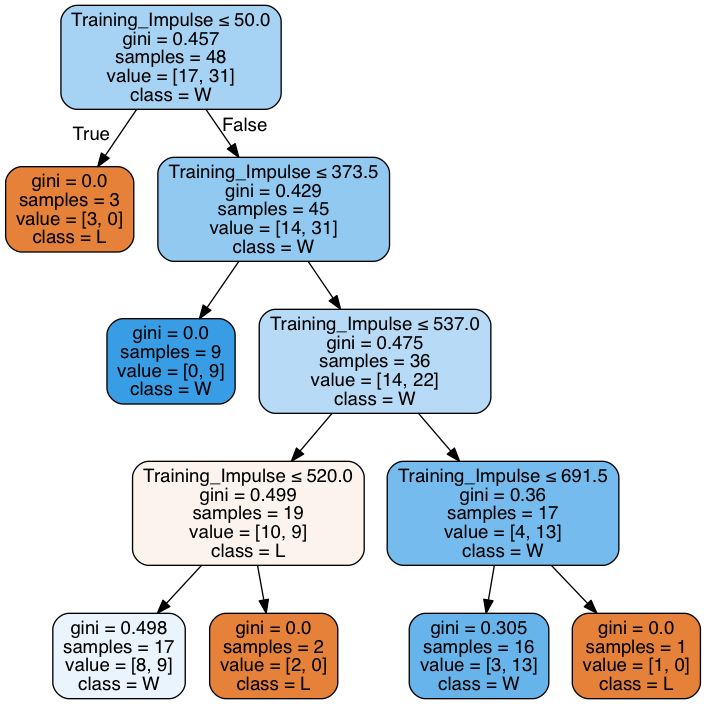

In [55]:
def decision(feature):
    decisionTree = tree.DecisionTreeClassifier(max_depth=4)

    XTrain, XTest, yTrain, yTest = splitData(feature)
    # fit the tree with the training data
    decisionTree = decisionTree.fit(XTrain, yTrain)

    # predict with the training data
    y_pred_train = decisionTree.predict(XTrain)
    # measure accuracy
    print('Accuracy on training data = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

    # predict with the test data
    y_pred = decisionTree.predict(XTest)
    # measure accuracy
    print('Accuracy on test data = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

    renderTree(decisionTree, ["Training_Impulse"])
    
decision(['Training_Impulse'])

Accuracy on training data=  1.0
Accuracy on test data=  0.6923076923076923


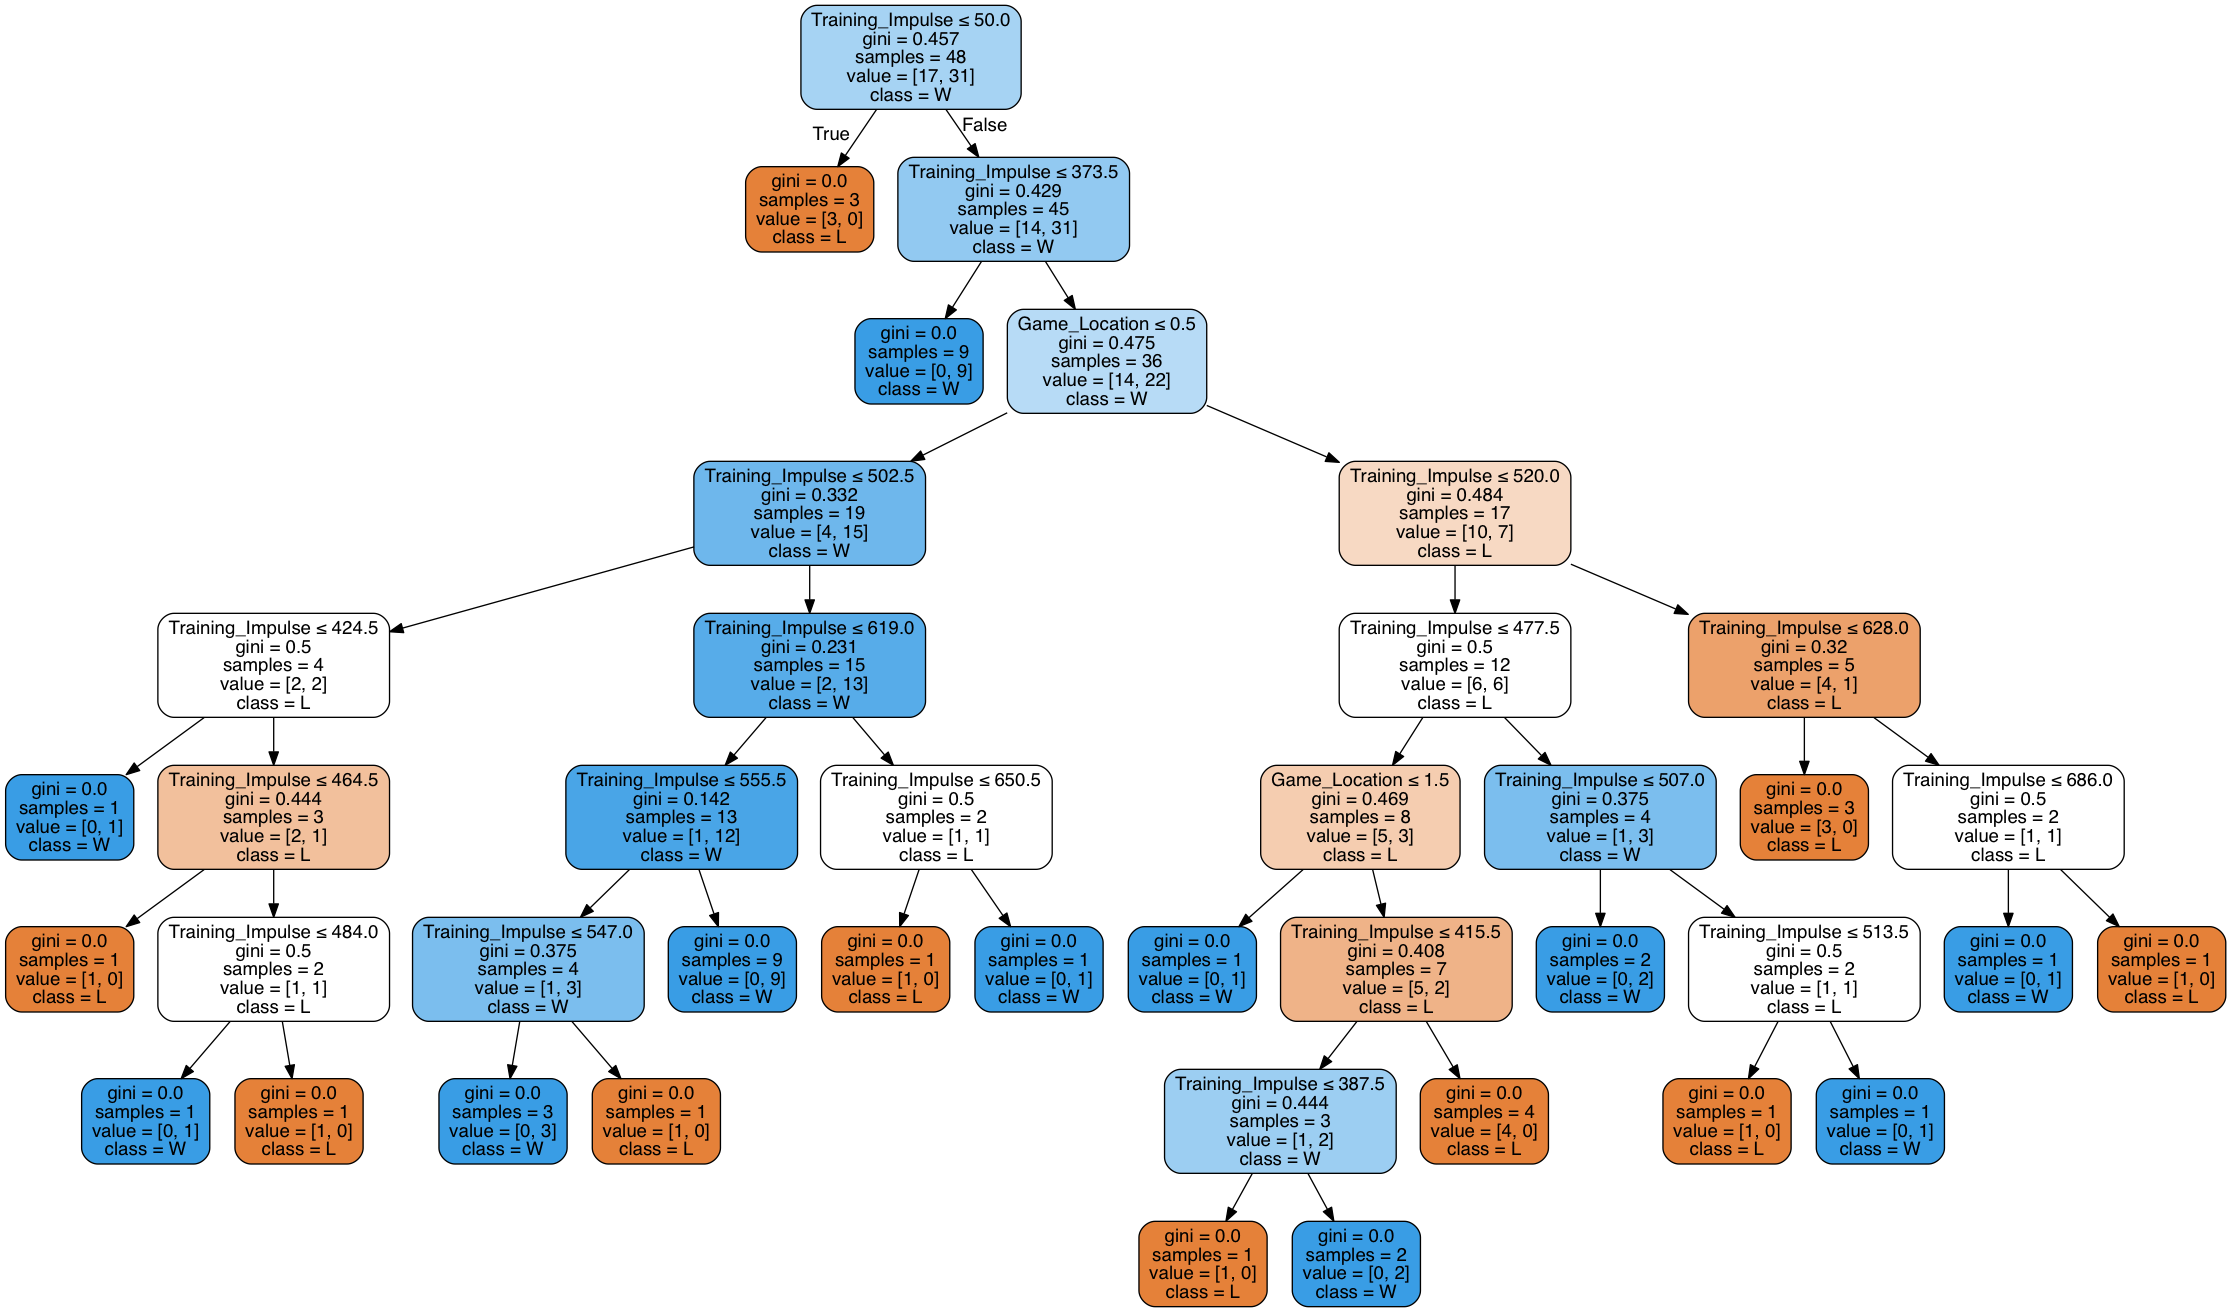

In [56]:
#Multiple features
used_features = ["Training_Impulse", "Game_Location"]
XTrain, XTest, yTrain, yTest = splitData(used_features)
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree, used_features)

# Conclusion
This analysis suggests that when coaches select players, they must look into injury status and types. If a player has an injury, the coaches should not put them in during the game. Also, from the prediction we attained almost 60% accuracy to predict whether our team will win or lose based on the game location and performance of each player.
Overall, this project was difficult. There were a few errors in the data that we were given that were very hard to catch because we knew very little about the data. One major flaw in the data was that the team values for each day were not calculated as we thought it was. So, we decided that the data was either wrong or weighted and had to calculate our own team values for the necessary features. Prediction was especially hard with this data because most of the variables were categorical. Therefore, we could not achieve our intial goal of predicting a player's performance based off of other features or the goal of seeing how the players' performances contribute to the team's performance. Regardless, in the future we can try different versions of the decision tree and explore visualization methods.